<a href="https://colab.research.google.com/github/Novita20/PCVK_GANJIL_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

import cv2 as cv
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from math import log10, sqrt
import glob



**Gamma Correction**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


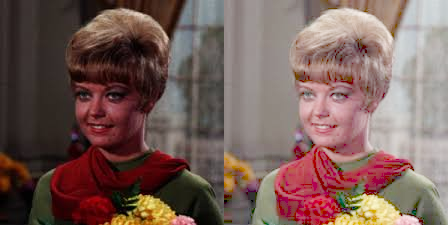

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK/Images/pp.png')
gamma_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(image[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((image, gamma_image))
cv2_imshow(final_frame)

**Image Depth**

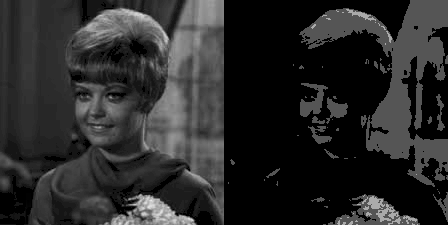

In [4]:
bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
image = cv.imread('/content/drive/MyDrive/PCVK/Images/pp.png', cv.IMREAD_GRAYSCALE)
image_depth = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    # for c in range(image.shape[2]):
    image_depth[y,x] = int(image[y, x] / level) * int(level)

final_frame = cv.hconcat((image, image_depth))
cv2_imshow(final_frame)

**Average Denoising**

**PNSR**

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth (pisahkan dengan spasi): 5 10 20 40 80 100
PSNR for Bit Depth 5: 29.100025502717397


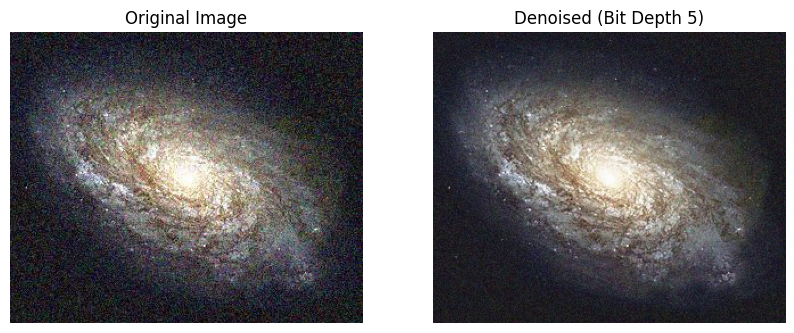

PSNR for Bit Depth 10: 29.0104781651268


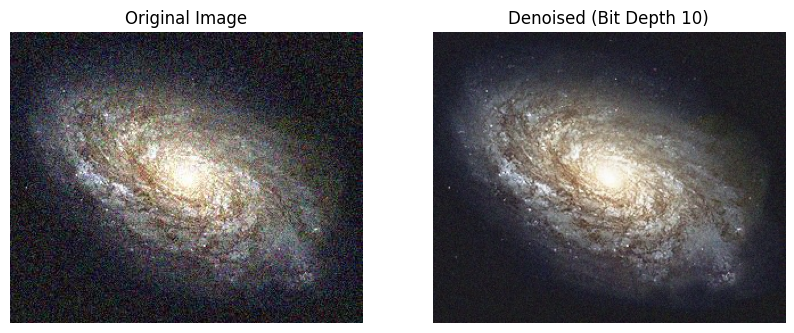

PSNR for Bit Depth 20: 28.954817566721395


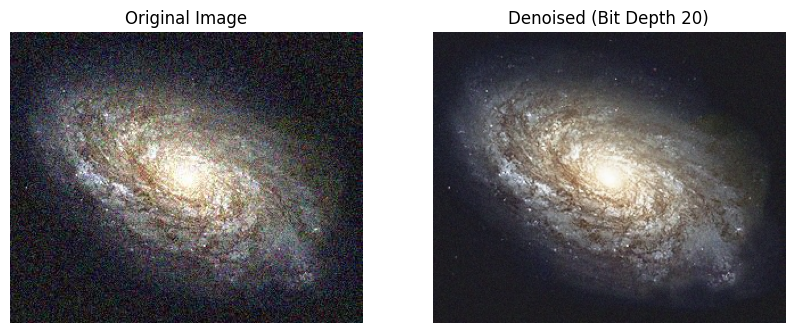

PSNR for Bit Depth 40: 28.929721411116667


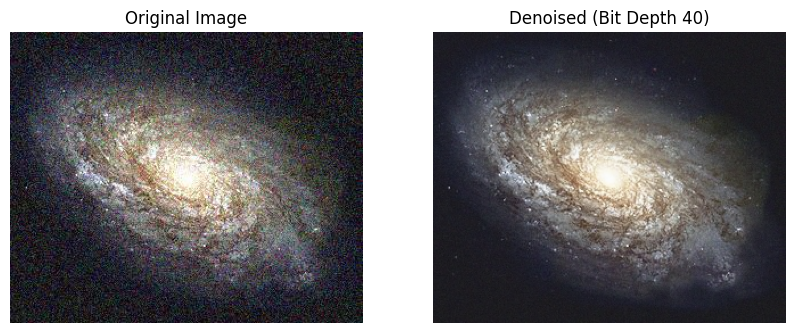

PSNR for Bit Depth 80: 28.927593825326717


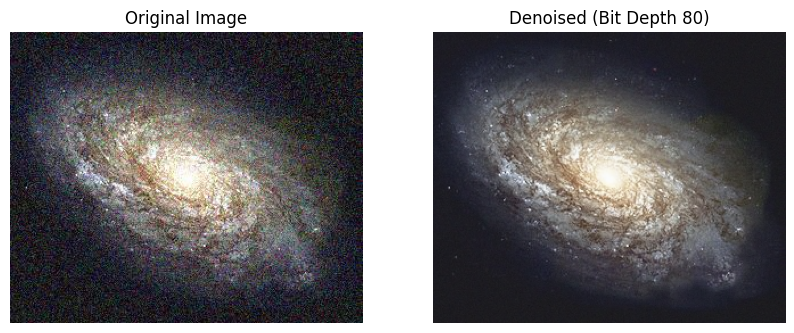

PSNR for Bit Depth 100: 28.924639161773364


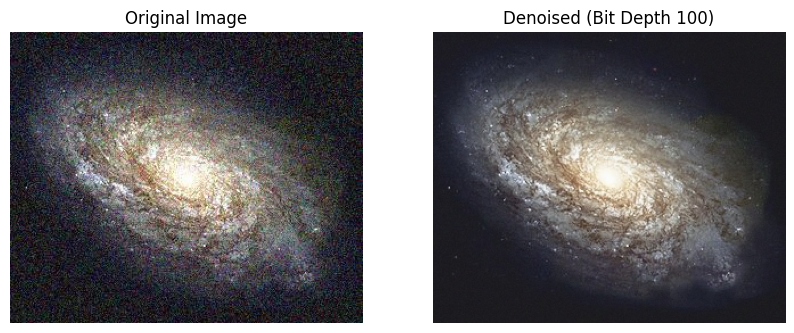

In [11]:
print(' Simulasi Image Depth ')
print('----------------------------------')

try:
    bit_depths = input('Masukkan nilai Bit Depth (pisahkan dengan spasi): ').split()
    bit_depths = [int(bit_depth) for bit_depth in bit_depths]
except ValueError:
    print('Error, invalid input')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

original_img = cv_img[0]  # Menggunakan gambar pertama sebagai gambar asli

for bit_depth in bit_depths:
    if bit_depth <= len(cv_img):
        avg_denoised_img = np.mean(cv_img[:bit_depth], axis=0).astype(np.uint8)

        def PSNR(img1, img2):
            mse = np.mean((img1 - img2) ** 2)
            if mse == 0:
                return 100
            max_pixel = 255.0
            psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
            return psnr

        print(f'PSNR for Bit Depth {bit_depth}: {PSNR(original_img, avg_denoised_img)}')

        # Menampilkan gambar asli dan hasil denoising
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv.cvtColor(avg_denoised_img, cv.COLOR_BGR2RGB))
        plt.title(f'Denoised (Bit Depth {bit_depth})')
        plt.axis('off')

        plt.show()
    else:
        print(f'Bit Depth {bit_depth} melebihi jumlah gambar yang tersedia.')

**Image Masking**

In [14]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

AttributeError: ignored